In [1]:
from scipy.stats import invgamma
from scipy.stats import norm
from multiprocessing import Pool
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [40]:
def integral(estimate, ts):
    elements = np.ones(len(ts) - 1)
    for i in range(len(ts) - 1):
        elements[i] = (ts[i+1] - ts[i])*(estimate[i+1] + estimate[i])/2
    return sum(elements)

def sum1(beta):
    elements = np.ones(N)
    for i in range(N):
        elements[i] = p[i, 0] - beta * (p[i, 1] - ave_x)
    return np.sum(elements)

def sum2(alpha):
    elements = np.ones(N)
    for i in range(N):
        elements[i] = (p[i, 1] - ave_x)*(p[i, 0] - alpha)
    return np.sum(elements)

def sum3(alpha, beta):
    elements = np.ones(N)
    for i in range(N):
        elements[i] = (p[i, 0] - alpha - beta*(p[i, 1] - ave_x))**2
    return np.sum(elements)

def loglike(alpha, beta, sigma):
    return N*np.log(1/(sigma*np.sqrt(2*np.pi))) - sum3(alpha, beta) / (2*sigma)

def function1(w):
    if w < 100:
        np.random.seed(datetime.now().microsecond)
        
        ###### ここを変えてね！
        n = 10
        c = 2
        ######
        
        estimates = np.ones(n+1)
        ts = np.ones(n+1)

        for i in range(n+1):
            t = (i/n)**c
            ts[i] = t

            alphas = np.ones(sample_iter)
            betas = np.ones(sample_iter)
            sigmas = np.ones(sample_iter)
            
            if i == 0:
                alphas[0] = 3000
                betas[0] = 185
                sigmas[0] = 90000

            else:
                alphas[0] = np.mean(alpha_sample)
                betas[0] = np.mean(beta_sample)
                sigmas[0] = np.mean(sigma_sample)

            for j in range(sample_iter -1):

                location_alpha = (sigma_alpha*t*sum1(betas[-1]) + sigmas[-1]*mu_alpha) / (sigma_alpha * N*t + sigmas[-1])
                scale_alpha = np.sqrt((sigma_alpha * sigmas[-1]) / (sigma_alpha * N*t + sigmas[-1]))
                alphas[j+1] = norm.rvs(loc = location_alpha, scale = scale_alpha)

                location_beta = (sigma_beta * t * sum2(alphas[-1]) + sigmas[-1] * mu_beta) / (sigma_beta *t* var*N + sigmas[-1])
                scale_beta = np.sqrt((sigmas[-1] * sigma_beta) / (sigma_beta *t* var*N + sigmas[-1]))
                betas[j+1] = norm.rvs(loc = location_beta, scale = scale_beta)

                shape = N*t/2 + a
                invrate = 2*b / (b*t*sum3(alphas[-1], betas[-1]) + 2)
                sigmas[j+1] = invgamma.rvs(a = shape, scale = 1/ invrate)

            alpha_sample = alphas[burn_in:]
            beta_sample = betas[burn_in:len(betas)]
            sigma_sample = sigmas[burn_in:len(sigmas)]

            box = np.ones(len(alpha_sample))
            for k, l in enumerate(alpha_sample):
                box[k] = loglike(l, beta_sample[k], sigma_sample[k])

            estimates[i] = np.average(box)
        
        return estimates
    
def sum4(beta):
    elements = np.ones(N)
    for i in range(N):
        elements[i] = p[i, 0] - beta * (p[i, 2] - ave_z)
    return np.sum(elements)

def sum5(alpha):
    elements = np.ones(N)
    for i in range(N):
        elements[i] = (p[i, 2] - ave_z)*(p[i, 0] - alpha)
    return np.sum(elements)

def sum6(alpha, beta):
    elements = np.ones(N)
    for i in range(N):
        elements[i] = (p[i, 0] - alpha - beta*(p[i, 2] - ave_z))**2
    return np.sum(elements)    

def loglike2(alpha, beta, sigma):
    return N*np.log(1/(sigma*np.sqrt(2*np.pi))) - sum6(alpha, beta) / (2*sigma)
    
def function2(w):
    if w < 100:
        np.random.seed(datetime.now().microsecond)
        
        ###### ここを変えてね！
        n = 10
        c = 2
        ######
        
        estimates = np.ones(n+1)
        ts = np.ones(n+1)

        for i in range(n+1):
            t = (i/n)**c
            ts[i] = t

            gammas = np.ones(sample_iter)
            deltas = np.ones(sample_iter)
            taus = np.ones(sample_iter)
            
            if i == 0:
                gammas[0] = 3000
                deltas[0] = 185
                taus[0] = 90000

            else:
                gammas[0] = np.mean(gamma_sample)
                deltas[0] = np.mean(delta_sample)
                taus[0] = np.mean(tau_sample)

            for j in range(sample_iter - 1):

                location_alpha = (sigma_alpha*t*sum4(deltas[-1]) + sigmas[-1]*mu_alpha) / (sigma_alpha * N*t + taus[-1])
                scale_alpha = np.sqrt((sigma_alpha * taus[-1]) / (sigma_alpha * N*t + taus[-1]))
                gammas[j+1] = norm.rvs(loc = location_alpha, scale = scale_alpha)

                location_beta = (sigma_beta * t * sum5(gammas[-1]) + taus[-1] * mu_beta) / (sigma_beta *t* var2*N + taus[-1])
                scale_beta = np.sqrt((taus[-1] * sigma_beta) / (sigma_beta *t* var2*N + taus[-1]))
                deltas[j+1] = norm.rvs(loc = location_beta, scale = scale_beta)

                shape = N*t/2 + a
                invrate = 2*b / (b*t*sum6(gammas[-1], deltas[-1]) + 2)
                taus[j+1] = invgamma.rvs(a = shape, scale = 1/ invrate)

            gamma_sample = gammas[burn_in:]
            delta_sample = deltas[burn_in:len(deltas)]
            tau_sample = taus[burn_in:len(taus)]

            box2 = np.ones(len(gamma_sample))
            for k, l in enumerate(gamma_sample):
                box2[k] = loglike2(l, delta_sample[k], tau_sample[k])

            estimates[i] = np.average(box)
        
        return estimates

In [35]:
pine = pd.read_table("pine.txt", delim_whitespace = True)
p = pine.values
ave_x = np.average(p[:, 1]).item()
ave_z = np.average(p[:, 2]).item()

mu_alpha = 3000
sigma_alpha = 10**6
mu_beta = 185
sigma_beta = 10**4
a = 3
b = 1/(2*300**2)

N = np.shape(p)[0]
var = np.var(p[:, 1])
var2 = np.var(p[:, 2])

# ここをいじってね。
sample_iter = 1000
burn_in = 30
m = 10
core = 2


収束の確認

In [25]:
# model 1

n = 10
c = 2
######

estimates = np.ones(n+1)
ts = np.ones(n+1)


t = (1/n)**c


alphas = np.ones(sample_iter)
betas = np.ones(sample_iter)
sigmas = np.ones(sample_iter)


alphas[0] = 3000
betas[0] = 185
sigmas[0] = 90000


for j in range(sample_iter -1):

    location_alpha = (sigma_alpha*t*sum1(betas[-1]) + sigmas[-1]*mu_alpha) / (sigma_alpha * N*t + sigmas[-1])
    scale_alpha = np.sqrt((sigma_alpha * sigmas[-1]) / (sigma_alpha * N*t + sigmas[-1]))
    r = norm.rvs(loc = location_alpha, scale = scale_alpha)
    alphas[j+1] = r

    location_beta = (sigma_beta * t * sum2(alphas[-1]) + sigmas[-1] * mu_beta) / (sigma_beta *t* var*N + sigmas[-1])
    scale_beta = np.sqrt((sigmas[-1] * sigma_beta) / (sigma_beta *t* var*N + sigmas[-1]))
    q = norm.rvs(loc = location_beta, scale = scale_beta)
    betas[j+1] = q

    shape = N*t/2 + a
    invrate = 2*b / (b*t*sum3(alphas[-1], betas[-1]) + 2)
    s = invgamma.rvs(a = shape, scale = 1/ invrate)
    sigmas[j+1] = s

<function matplotlib.pyplot.plot>

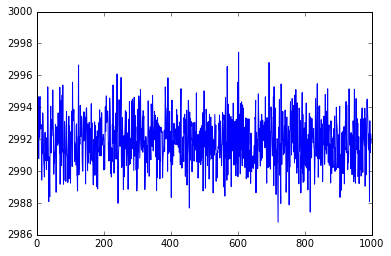

In [29]:
plt.plot(alphas)
plt.plot

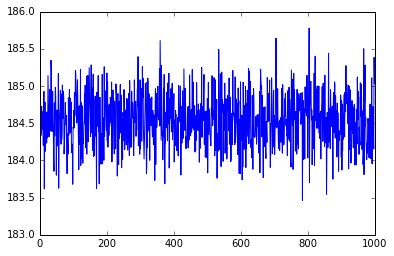

In [30]:
plt.plot(betas)

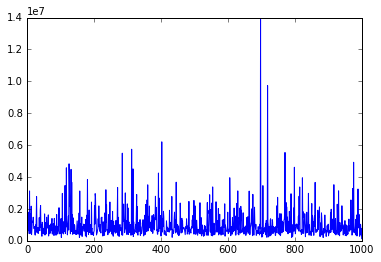

In [31]:
plt.plot( sigmas)

In [47]:
# model 2

sample_iter = 10000
n = 10
c = 2
######

estimates = np.ones(n+1)
ts = np.ones(n+1)


t = (1/n)**c


gammas = np.ones(sample_iter)
deltas = np.ones(sample_iter)
taus = np.ones(sample_iter)


gammas[0] = 3000
deltas[0] = 185
taus[0] = 90000

for j in range(sample_iter - 1):

    location_alpha = (sigma_alpha*t*sum4(deltas[-1]) + sigmas[-1]*mu_alpha) / (sigma_alpha * N*t + taus[-1])
    scale_alpha = np.sqrt((sigma_alpha * taus[-1]) / (sigma_alpha * N*t + taus[-1]))
    r = norm.rvs(loc = location_alpha, scale = scale_alpha)
    gammas[j+1] = r

    location_beta = (sigma_beta * t * sum5(gammas[-1]) + taus[-1] * mu_beta) / (sigma_beta *t* var2*N + taus[-1])
    scale_beta = np.sqrt((taus[-1] * sigma_beta) / (sigma_beta *t* var2*N + taus[-1]))
    q = norm.rvs(loc = location_beta, scale = scale_beta)
    deltas[j+1] = q

    shape = N*t/2 + a
    invrate = 2*b / (b*t*sum6(gammas[-1], deltas[-1]) + 2)
    s = invgamma.rvs(a = shape, scale = 1/ invrate)
    taus[j+1] = s

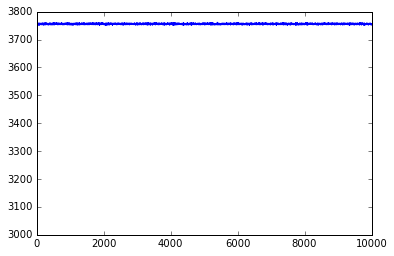

In [48]:
plt.plot(gammas)

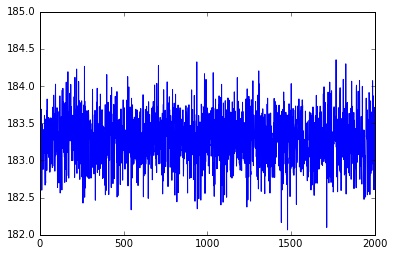

In [45]:
plt.plot(deltas)

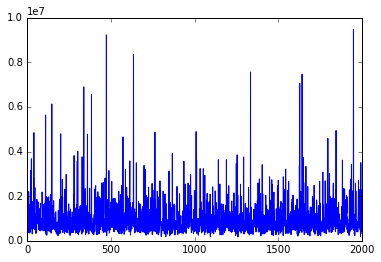

In [46]:
plt.plot(taus)

# computing BF


model1

In [20]:
if __name__ == '__main__':
    p = Pool(core) 
    result1 = p.map(function1, range(m))

In [21]:
result1

[array([-959.28209592, -614.1680534 , -659.48190763, -679.13738716,
        -690.69486335, -697.48481393, -702.43690979, -705.62848885,
        -707.40024899, -709.12244001, -710.6841005 ]),
 array([-970.15107245, -613.06650482, -656.53031467, -679.37564283,
        -691.92994213, -698.84155599, -702.69524234, -705.58268621,
        -707.76872629, -709.2320224 , -709.42826646]),
 array([-965.76672354, -614.5412151 , -659.06830071, -680.24256818,
        -690.63429642, -698.98499252, -702.61308874, -706.12380707,
        -707.62354123, -708.71832334, -709.6897072 ]),
 array([-993.04140379, -613.21812147, -658.61842983, -680.16126042,
        -691.38315555, -698.60503206, -701.93067305, -705.89185464,
        -707.52299763, -708.62917472, -709.81606926]),
 array([-931.51026965, -612.56353287, -658.85715153, -679.69330927,
        -691.69846066, -698.24289017, -702.44560073, -705.64565808,
        -707.20125932, -708.93725353, -709.71847833]),
 array([-929.26764231, -613.75381682, -658.57

In [7]:
ts = [(i/10)**2 for i in range(11)]

expect1 = np.ones(10)
for i in range(10):
    expect1[i] = integral(result1[i], ts)

In [8]:
expect1

array([-700.79426843, -700.40383101, -700.9605367 , -700.52729571,
       -700.53928219, -700.60771555, -700.65756456, -700.48123203,
       -700.69806384, -700.83271647])

model2

In [9]:
if __name__ == '__main__':
    result2 = p.map(function2, range(m))

In [10]:
ts = [(i/10)**2 for i in range(11)]

expect2 = np.ones(10)
for i in range(10):
    expect2[i] = integral(result2[i], ts)

In [11]:
expect2

array([-700.72181525, -700.53943986, -700.85300765, -700.51260944,
       -700.73491173, -700.77328027, -700.77677517, -700.52847042,
       -700.88961816, -700.53515884])

BF21

In [12]:
bf_21 = []
for a,b in zip(expect1, expect2):
    bf_21.append(np.exp(b-a))

In [13]:
bf_21

[1.0751424617129306,
 0.87318410799839752,
 1.1135232118770031,
 1.0147946439821462,
 0.82231681815333513,
 0.84741501651074747,
 0.88762083434111649,
 0.95385998185749832,
 0.82567476851322552,
 1.34656598546509]